<a href="https://colab.research.google.com/github/vinicius-mattoso/Web_Scraping_FII/blob/main/Web_Scraping_%26_An%C3%A1lise_de_FII.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Contato do Autor: [![Linkedin Badge](https://img.shields.io/badge/-LinkedIn-blue?style=flat-square&logo=Linkedin&logoColor=white&link=https://www.linkedin.com/in/vinicius-mattoso/)](https://www.linkedin.com/in/vinicius-mattoso/)
[![Gmail Badge](https://img.shields.io/badge/-Gmail-c14438?style=flat-square&logo=Gmail&logoColor=white&link=mailto:vinicius.vmrs@gmail.com)](mailto:vinicius.vmrs@gmail.com)

# Contextualização

1.   Item da lista
2.   Item da lista



Fundos Imobiliários são uma alteranativa para quem esta buscando investimentos no mercado variável. Atualmente tem tido uma grande adesão de novos investidores pois o IFIX, que é um indicie que replica sua performace, tem performado melhor que a IBOVESPA que é outra opção do mercado variável.


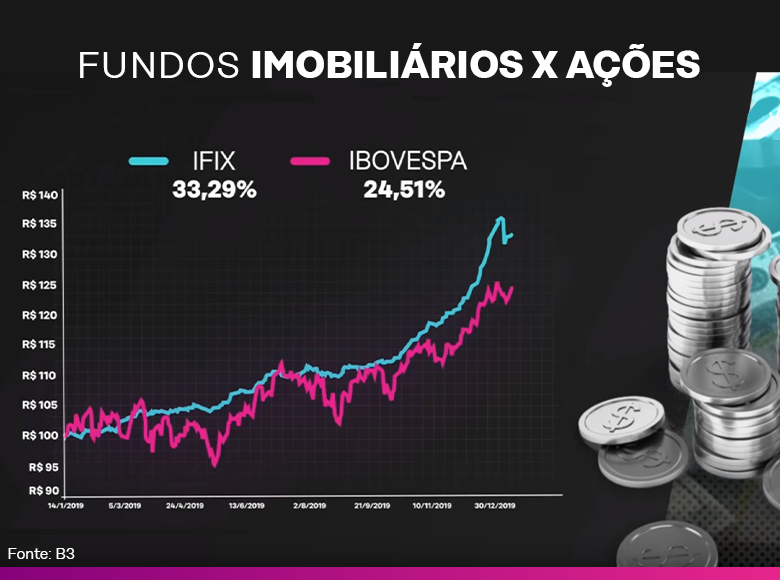



# Objetivo

O Objetivo desse projeto ***não é nenhuma recomendação de investimento***, é apenas para ajudar o investidor a análisar os fundos imobiliários segundo algumas métricas adotadas pelo autor mas que podem ser facilmente alteradas de acordo com a vontade do usuário.

# Etapas


1.   Web Scraping do ranking do site: https://www.fundsexplorer.com.br/ranking
2.   Tratamento dos dados, object --> float
3.   Segmentação pelo tipo de fundo
4.   Criação dos seguintes filtros:
    1.  Fundos com valores patrimoniais acima de 1 Milhão;
    2.  Fundos com valores P/VPA abaixo de  1.15;
    3.  Fundos que possuem ativos físicos, precisão ter pelo menos 5 empreendimentos;

5.  Criação de uma nova coluna (DELTA), contendo o delta entre o preço atual e o VPA.
6. Aplicar um filtro limitando o DELTA menores que 10 reais.
7. Fazer uma ordenação dos fundos com base no ['DY(12M)_ACUMULADO' , 'DIVIDEND_YIELD']
8. Analisar os 5 primeiros fundos de cada tipo e fazer uma análise mais detalhada

# Atualizações

1. Criação de novos filtros;
2. Ajuste dos parâmetros utilizados no filtro já existente;
3. Utilizar o Yahoo Finanças para buscar o histórico dos fundos escolhidos
4. Fazer um pipeline dos filtros
5. Fazer uma análise gráfica do efeitos dos filtros






# Web Scraping

In [1]:
#%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%
# Fazendo o webscraping da Pag Funds explorer, quando as caracteristicas do fundo são exibidas em forma de tabela
#%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%

# importandos as bibliotecas necessárias
from bs4 import BeautifulSoup
from urllib.request import Request, urlopen

#funds = 'https://www.fundsexplorer.com.br/ranking'
#page = urllib.request.urlopen(funds)

site= "https://www.fundsexplorer.com.br/ranking"
hdr = {'User-Agent': 'Mozilla/5.0'}
req = Request(site,headers=hdr)
page = urlopen(req)
soup = BeautifulSoup(page)

In [2]:
#%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%
# Para identificar a tabela correta utilizar o inspecionar e colocar o nome da class da tabela desejada
#%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%

table = soup.find('table', class_='table table-hover')
#table

In [3]:
#%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%
#gerando as listas que vão receber os valores contidos na tabela do site
#%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%
FUND=[]
SETOR=[]
PRA=[]
LIQD=[]
DIVIDENDO=[]
DY=[]
DY3MA=[]
DY6MA=[]
DY12MA=[]
DY3MEAN=[]
DY6MEAN=[]
DY12MEAN=[]
DYANO=[]
VARPRE=[]
RENTPER=[]
RENTAC=[]
PL=[]
VPA=[]
P_VPA=[]
DYPATRI=[]
VARPATRI=[]
RENT_PTR_PERID=[]
RENT_ACUMU=[]
VAC_FISICA=[]
VAC_FINANCEIRA=[]
QTD_ATIVOS=[]


for row in table.find_all("tr"): #para tudo que estiver em <tr>
    cells = row.find_all('td') #variável para encontrar <td>
    if len(cells)==26: #número de colunas
        FUND.append(cells[0].find(text=True)) 
        SETOR.append(cells[1].find(text=True))
        PRA.append(cells[2].find(text=True))
        LIQD.append(cells[3].find(text=True))
        DIVIDENDO.append(cells[4].find(text=True))
        DY.append(cells[5].find(text=True)) 
        DY3MA.append(cells[6].find(text=True))
        DY6MA.append(cells[7].find(text=True))
        DY12MA.append(cells[8].find(text=True))
        DY3MEAN.append(cells[9].find(text=True))
        DY6MEAN.append(cells[10].find(text=True)) 
        DY12MEAN.append(cells[11].find(text=True))
        DYANO.append(cells[12].find(text=True))
        VARPRE.append(cells[13].find(text=True))
        RENTPER.append(cells[14].find(text=True))
        RENTAC.append(cells[15].find(text=True)) 
        PL.append(cells[16].find(text=True))
        VPA.append(cells[17].find(text=True))
        P_VPA.append(cells[18].find(text=True))
        DYPATRI.append(cells[19].find(text=True))
        VARPATRI.append(cells[20].find(text=True))
        RENT_PTR_PERID.append(cells[21].find(text=True)) 
        RENT_ACUMU.append(cells[22].find(text=True))
        VAC_FISICA.append(cells[23].find(text=True))
        VAC_FINANCEIRA.append(cells[24].find(text=True))
        QTD_ATIVOS.append(cells[25].find(text=True))

In [4]:
#%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%
#Criando o Data Frame para receber todas as colunas
#%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%
#Importando a biblioteca necessária
import pandas as pd

df_FUNDS = pd.DataFrame()
df_FUNDS['CÓDIGO_DO_FUNDO']=FUND
df_FUNDS['SETOR']=SETOR
df_FUNDS['PREÇO_ATUAL']=PRA
df_FUNDS['LIQUIDEZ_DIÁRIA']=LIQD
df_FUNDS['DIVIDENDOS']=DIVIDENDO
df_FUNDS['DIVIDEND_YIELD']=DY
df_FUNDS['DY(3M)_ACUMULADO']=DY3MA
df_FUNDS['DY(6M)_ACUMULADO']=DY6MA
df_FUNDS['DY(12M)_ACUMULADO']=DY12MA
df_FUNDS['DY(3M)_MÉDIA']=DY3MEAN
df_FUNDS['DY(6M)_MÉDIA']=DY6MEAN
df_FUNDS['DY(12M)_MÉDIA']=DY12MEAN
df_FUNDS['DY_ANO']=DYANO
df_FUNDS['VARIAÇÃO_PREÇO']=VARPRE
df_FUNDS['RENTAB._PERÍODO']=RENTPER
df_FUNDS['RENTAB._ACUMULADA']=RENTAC
df_FUNDS['PATRIMÔNIO_LÍQ.']=PL
df_FUNDS['VPA']=VPA
df_FUNDS['P/VPA']=P_VPA
df_FUNDS['DY_PATRIMONIAL']=DYPATRI
df_FUNDS['VARIAÇÃO_PATRIMONIAL']=VARPATRI
df_FUNDS['RENTAB._PATR._NO_PERÍODO']=RENT_PTR_PERID
df_FUNDS['RENTAB._PATR._ACUMULADA']=RENT_ACUMU
df_FUNDS['VACÂNCIA_FÍSICA']=VAC_FISICA
df_FUNDS['VACÂNCIA_FINANCIERA']=VAC_FINANCEIRA
df_FUNDS['QTD_ATIVOS']=QTD_ATIVOS

In [5]:
#%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%
# Vamos observar quais foram os tipos de variaveis extraídas
#%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%
df_FUNDS.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 215 entries, 0 to 214
Data columns (total 26 columns):
 #   Column                    Non-Null Count  Dtype 
---  ------                    --------------  ----- 
 0   CÓDIGO_DO_FUNDO           215 non-null    object
 1   SETOR                     208 non-null    object
 2   PREÇO_ATUAL               215 non-null    object
 3   LIQUIDEZ_DIÁRIA           215 non-null    object
 4   DIVIDENDOS                215 non-null    object
 5   DIVIDEND_YIELD            215 non-null    object
 6   DY(3M)_ACUMULADO          215 non-null    object
 7   DY(6M)_ACUMULADO          215 non-null    object
 8   DY(12M)_ACUMULADO         215 non-null    object
 9   DY(3M)_MÉDIA              215 non-null    object
 10  DY(6M)_MÉDIA              215 non-null    object
 11  DY(12M)_MÉDIA             215 non-null    object
 12  DY_ANO                    215 non-null    object
 13  VARIAÇÃO_PREÇO            215 non-null    object
 14  RENTAB._PERÍODO           

In [6]:
#%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%
# vamos observar as primeiras 5 linhas do data frame
#%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%
df_FUNDS=df_FUNDS.sort_values(by="CÓDIGO_DO_FUNDO")
df_FUNDS.head(5)

,CÓDIGO_DO_FUNDO,SETOR,PREÇO_ATUAL,LIQUIDEZ_DIÁRIA,DIVIDENDOS,DIVIDEND_YIELD,DY(3M)_ACUMULADO,DY(6M)_ACUMULADO,DY(12M)_ACUMULADO,DY(3M)_MÉDIA,DY(6M)_MÉDIA,DY(12M)_MÉDIA,DY_ANO,VARIAÇÃO_PREÇO,RENTAB._PERÍODO,RENTAB._ACUMULADA,PATRIMÔNIO_LÍQ.,VPA,P/VPA,DY_PATRIMONIAL,VARIAÇÃO_PATRIMONIAL,RENTAB._PATR._NO_PERÍODO,RENTAB._PATR._ACUMULADA,VACÂNCIA_FÍSICA,VACÂNCIA_FINANCIERA,QTD_ATIVOS
85,ABCP11,Shoppings,"R$ 78,51",1659.0,"R$ 0,40","0,52%","1,79%","2,87%","4,68%","0,60%","0,48%","0,39%","1,24%","-1,21%","-0,69%","0,02%","R$ 1.075.455.180,07","R$ 88,12","0,89",N/A,N/A,N/A,N/A,"2,50%",N/A,1
34,AFCR11,Híbrido,"R$ 118,95",466.0,"R$ 1,03","0,90%","2,58%","5,05%","0,00%","0,86%","0,84%","0,00%","1,74%","-0,94%","-0,04%","0,79%","R$ 121.872.381,33","R$ 102,65","1,16",N/A,N/A,N/A,N/A,N/A,N/A,0
110,AIEC11,Lajes Corporativas,"R$ 88,97",6355.0,"R$ 0,57","0,61%","1,82%","0,00%","0,00%","0,61%","0,00%","0,00%","1,21%","-0,52%","0,09%","0,69%","R$ 483.147.923,80","R$ 100,13","0,89",N/A,N/A,N/A,N/A,"0,00%",N/A,2
3,ALMI11,Lajes Corporativas,"R$ 1.110,00",165.0,"R$ 0,00","0,00%","0,00%","0,00%","0,00%","0,00%","0,00%","0,00%","0,00%","2,27%","2,27%","-28,29%","R$ 221.318.898,42","R$ 1.990,69","0,56",N/A,N/A,N/A,N/A,"68,15%",N/A,1
209,ALZR11,Logística,"R$ 122,65",9826.0,"R$ 0,59","0,48%","1,16%","2,03%","4,93%","0,39%","0,34%","0,41%","0,85%","-4,96%","-4,51%","-4,15%","R$ 458.898.939,12","R$ 102,44","1,20",N/A,N/A,N/A,N/A,"0,00%",N/A,12


### Vale destacar que as colunas são do tipo object, então se faz necessário um trabalho de limpeza/Conversão dos dados para futura utilização numérica do mesmo.

# Tratamento dos dados extraídos

In [7]:
#%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%
# Convertendo as colunas para formato float para poder serem trabalhadas
#%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%
df_teste=df_FUNDS.copy()
# Trocoando virgula(,) por ponto(.)
df_teste['LIQUIDEZ_DIÁRIA'] =df_teste['LIQUIDEZ_DIÁRIA'].str.replace(',', '.')
df_teste['P/VPA'] = df_teste['P/VPA'].str.replace(',', '.')
df_teste['QTD_ATIVOS'] = df_teste['QTD_ATIVOS'].str.replace(',', '.')
#Convertendo para numérico
df_teste['LIQUIDEZ_DIÁRIA'] = pd.to_numeric(df_teste['LIQUIDEZ_DIÁRIA'],errors='coerce')
df_teste['P/VPA'] = pd.to_numeric(df_teste['P/VPA'],errors='coerce')
df_teste['QTD_ATIVOS'] = pd.to_numeric(df_teste['QTD_ATIVOS'],errors='coerce')

In [8]:
# Trocoando R() por vazio()
df_teste['PREÇO_ATUAL'] =df_teste['PREÇO_ATUAL'].str.replace('R', '')
df_teste['DIVIDENDOS'] =df_teste['DIVIDENDOS'].str.replace('R', '')
df_teste['VPA'] =df_teste['VPA'].str.replace('R', '')
# Trocoando $() por vazio()
df_teste['PREÇO_ATUAL'] =df_teste['PREÇO_ATUAL'].str.replace('$', '')
df_teste['DIVIDENDOS'] =df_teste['DIVIDENDOS'].str.replace('$', '')
df_teste['VPA'] =df_teste['VPA'].str.replace('$', '')
# Trocoando virgula(,) por ponto(.)
df_teste['PREÇO_ATUAL'] =df_teste['PREÇO_ATUAL'].str.replace(',', '.')
df_teste['DIVIDENDOS'] =df_teste['DIVIDENDOS'].str.replace(',', '.')
df_teste['VPA'] =df_teste['VPA'].str.replace(',', '.')
#Convertendo para numérico
df_teste['PREÇO_ATUAL'] = pd.to_numeric(df_teste['PREÇO_ATUAL'],errors='coerce')
df_teste['DIVIDENDOS'] = pd.to_numeric(df_teste['DIVIDENDOS'],errors='coerce')
df_teste['VPA'] = pd.to_numeric(df_teste['VPA'],errors='coerce')

In [9]:
#%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%
#tratando o caso especial do valor patrimonial
#%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%
 # Trocoando R() por vazio()
df_teste['PATRIMÔNIO_LÍQ.'] =df_teste['PATRIMÔNIO_LÍQ.'].str.replace('R', '')
# Trocoando $() por vazio()
df_teste['PATRIMÔNIO_LÍQ.'] =df_teste['PATRIMÔNIO_LÍQ.'].str.replace('$', '')
# Trocoando .() por vazio()
df_teste['PATRIMÔNIO_LÍQ.'] =df_teste['PATRIMÔNIO_LÍQ.'].str.replace('.', '')
# Trocoando virgula(,) por ponto(.)
df_teste['PATRIMÔNIO_LÍQ.'] =df_teste['PATRIMÔNIO_LÍQ.'].str.replace(',', '.')
#Convertendo para numérico
df_teste['PATRIMÔNIO_LÍQ.'] = pd.to_numeric(df_teste['PATRIMÔNIO_LÍQ.'],errors='coerce')

In [10]:
#%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%
#ajustando os casos dos valores percentuais
#%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%
# removendo o percentual %
df_teste['DIVIDEND_YIELD'] =df_teste['DIVIDEND_YIELD'].str.replace('%', '')
df_teste['DY(3M)_ACUMULADO'] =df_teste['DY(3M)_ACUMULADO'].str.replace('%', '')
df_teste['DY(6M)_ACUMULADO'] =df_teste['DY(6M)_ACUMULADO'].str.replace('%', '')
df_teste['DY(12M)_ACUMULADO'] =df_teste['DY(12M)_ACUMULADO'].str.replace('%', '')
df_teste['DY(3M)_MÉDIA'] =df_teste['DY(3M)_MÉDIA'].str.replace('%', '')
df_teste['DY(6M)_MÉDIA'] =df_teste['DY(6M)_MÉDIA'].str.replace('%', '')
df_teste['DY(12M)_MÉDIA'] =df_teste['DY(12M)_MÉDIA'].str.replace('%', '')
df_teste['DY_ANO'] =df_teste['DY_ANO'].str.replace('%', '')
df_teste['VARIAÇÃO_PREÇO'] =df_teste['VARIAÇÃO_PREÇO'].str.replace('%', '')
df_teste['RENTAB._PERÍODO'] =df_teste['RENTAB._PERÍODO'].str.replace('%', '')
df_teste['RENTAB._ACUMULADA'] =df_teste['RENTAB._ACUMULADA'].str.replace('%', '')
df_teste['DY_PATRIMONIAL'] =df_teste['DY_PATRIMONIAL'].str.replace('%', '')
df_teste['VARIAÇÃO_PATRIMONIAL'] =df_teste['VARIAÇÃO_PATRIMONIAL'].str.replace('%', '')
df_teste['RENTAB._PATR._NO_PERÍODO'] =df_teste['RENTAB._PATR._NO_PERÍODO'].str.replace('%', '')
df_teste['RENTAB._PATR._ACUMULADA'] =df_teste['RENTAB._PATR._ACUMULADA'].str.replace('%', '')
df_teste['VACÂNCIA_FÍSICA'] =df_teste['VACÂNCIA_FÍSICA'].str.replace('%', '')
df_teste['VACÂNCIA_FINANCIERA'] =df_teste['VACÂNCIA_FINANCIERA'].str.replace('%', '')

# torcando virgula(,) por ponto(.)
df_teste['DIVIDEND_YIELD'] =df_teste['DIVIDEND_YIELD'].str.replace(',', '.')
df_teste['DY(3M)_ACUMULADO'] =df_teste['DY(3M)_ACUMULADO'].str.replace(',', '.')
df_teste['DY(6M)_ACUMULADO'] =df_teste['DY(6M)_ACUMULADO'].str.replace(',', '.')
df_teste['DY(12M)_ACUMULADO'] =df_teste['DY(12M)_ACUMULADO'].str.replace(',', '.')
df_teste['DY(3M)_MÉDIA'] =df_teste['DY(3M)_MÉDIA'].str.replace(',', '.')
df_teste['DY(6M)_MÉDIA'] =df_teste['DY(6M)_MÉDIA'].str.replace(',', '.')
df_teste['DY(12M)_MÉDIA'] =df_teste['DY(12M)_MÉDIA'].str.replace(',', '.')
df_teste['DY_ANO'] =df_teste['DY_ANO'].str.replace(',', '.')
df_teste['VARIAÇÃO_PREÇO'] =df_teste['VARIAÇÃO_PREÇO'].str.replace(',', '.')
df_teste['RENTAB._PERÍODO'] =df_teste['RENTAB._PERÍODO'].str.replace(',', '.')
df_teste['RENTAB._ACUMULADA'] =df_teste['RENTAB._ACUMULADA'].str.replace(',', '.')
df_teste['DY_PATRIMONIAL'] =df_teste['DY_PATRIMONIAL'].str.replace(',', '.')
df_teste['VARIAÇÃO_PATRIMONIAL'] =df_teste['VARIAÇÃO_PATRIMONIAL'].str.replace(',', '.')
df_teste['RENTAB._PATR._NO_PERÍODO'] =df_teste['RENTAB._PATR._NO_PERÍODO'].str.replace(',', '.')
df_teste['RENTAB._PATR._ACUMULADA'] =df_teste['RENTAB._PATR._ACUMULADA'].str.replace(',', '.')
df_teste['VACÂNCIA_FÍSICA'] =df_teste['VACÂNCIA_FÍSICA'].str.replace(',', '.')
df_teste['VACÂNCIA_FINANCIERA'] =df_teste['VACÂNCIA_FINANCIERA'].str.replace(',', '.')

#Convertendo para numérico
df_teste['DIVIDEND_YIELD'] =pd.to_numeric(df_teste['DIVIDEND_YIELD'],errors='coerce')
df_teste['DY(3M)_ACUMULADO'] =pd.to_numeric(df_teste['DY(3M)_ACUMULADO'],errors='coerce')
df_teste['DY(6M)_ACUMULADO'] =pd.to_numeric(df_teste['DY(6M)_ACUMULADO'],errors='coerce')
df_teste['DY(12M)_ACUMULADO'] =pd.to_numeric(df_teste['DY(12M)_ACUMULADO'],errors='coerce')
df_teste['DY(3M)_MÉDIA'] =pd.to_numeric(df_teste['DY(3M)_MÉDIA'],errors='coerce')
df_teste['DY(6M)_MÉDIA'] =pd.to_numeric(df_teste['DY(6M)_MÉDIA'],errors='coerce')
df_teste['DY(12M)_MÉDIA'] =pd.to_numeric(df_teste['DY(12M)_MÉDIA'],errors='coerce')
df_teste['DY_ANO'] =pd.to_numeric(df_teste['DY_ANO'],errors='coerce')
df_teste['VARIAÇÃO_PREÇO'] =pd.to_numeric(df_teste['VARIAÇÃO_PREÇO'],errors='coerce')
df_teste['RENTAB._PERÍODO'] =pd.to_numeric(df_teste['RENTAB._PERÍODO'],errors='coerce')
df_teste['RENTAB._ACUMULADA'] =pd.to_numeric(df_teste['RENTAB._ACUMULADA'],errors='coerce')
df_teste['DY_PATRIMONIAL'] =pd.to_numeric(df_teste['DY_PATRIMONIAL'],errors='coerce')
df_teste['VARIAÇÃO_PATRIMONIAL'] =pd.to_numeric(df_teste['VARIAÇÃO_PATRIMONIAL'],errors='coerce')
df_teste['RENTAB._PATR._NO_PERÍODO'] =pd.to_numeric(df_teste['RENTAB._PATR._NO_PERÍODO'],errors='coerce')
df_teste['RENTAB._PATR._ACUMULADA'] =pd.to_numeric(df_teste['RENTAB._PATR._ACUMULADA'],errors='coerce')
df_teste['VACÂNCIA_FÍSICA'] =pd.to_numeric(df_teste['VACÂNCIA_FÍSICA'],errors='coerce')
df_teste['VACÂNCIA_FINANCIERA'] =pd.to_numeric(df_teste['VACÂNCIA_FINANCIERA'],errors='coerce')


In [11]:
#%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%
# AVALIANDO AGORA OS EFEITOS DAS TRANSFORMAÇÕES DE VARIAVEIS
#%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%
df_teste.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 215 entries, 85 to 2
Data columns (total 26 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   CÓDIGO_DO_FUNDO           215 non-null    object 
 1   SETOR                     208 non-null    object 
 2   PREÇO_ATUAL               203 non-null    float64
 3   LIQUIDEZ_DIÁRIA           209 non-null    float64
 4   DIVIDENDOS                215 non-null    float64
 5   DIVIDEND_YIELD            215 non-null    float64
 6   DY(3M)_ACUMULADO          214 non-null    float64
 7   DY(6M)_ACUMULADO          214 non-null    float64
 8   DY(12M)_ACUMULADO         214 non-null    float64
 9   DY(3M)_MÉDIA              214 non-null    float64
 10  DY(6M)_MÉDIA              214 non-null    float64
 11  DY(12M)_MÉDIA             214 non-null    float64
 12  DY_ANO                    206 non-null    float64
 13  VARIAÇÃO_PREÇO            214 non-null    float64
 14  RENTAB._PER

In [12]:
#%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%
# OBSERVANDO SE FICOU TUDO CERTINHO COMO ERA ESPERADO
#%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%
df_teste.head(2)

,CÓDIGO_DO_FUNDO,SETOR,PREÇO_ATUAL,LIQUIDEZ_DIÁRIA,DIVIDENDOS,DIVIDEND_YIELD,DY(3M)_ACUMULADO,DY(6M)_ACUMULADO,DY(12M)_ACUMULADO,DY(3M)_MÉDIA,DY(6M)_MÉDIA,DY(12M)_MÉDIA,DY_ANO,VARIAÇÃO_PREÇO,RENTAB._PERÍODO,RENTAB._ACUMULADA,PATRIMÔNIO_LÍQ.,VPA,P/VPA,DY_PATRIMONIAL,VARIAÇÃO_PATRIMONIAL,RENTAB._PATR._NO_PERÍODO,RENTAB._PATR._ACUMULADA,VACÂNCIA_FÍSICA,VACÂNCIA_FINANCIERA,QTD_ATIVOS
85,ABCP11,Shoppings,78.51,1659.0,0.40,0.52,1.79,2.87,4.68,0.60,0.48,0.39,1.24,-1.21,-0.69,0.02,1.075455e+09,88.12,0.89,NaN,NaN,NaN,NaN,2.5,NaN,1
34,AFCR11,Híbrido,118.95,466.0,1.03,0.90,2.58,5.05,0.00,0.86,0.84,0.00,1.74,-0.94,-0.04,0.79,1.218724e+08,102.65,1.16,NaN,NaN,NaN,NaN,NaN,NaN,0


# Segmentação pelo tipo de fundo

### Agora vamos começar a particionar esse Data frame separando por setor de atuação de cada FII

In [13]:
#%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%
#criando um variável com os valores únicos dos tipos de FII's
#%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%
tipos=df_teste['SETOR'].unique()
tipos

array(['Shoppings', 'Híbrido', 'Lajes Corporativas', 'Logística',
       'Títulos e Val. Mob.', 'Outros', None, 'Residencial', 'Hospital',
       'Hotel'], dtype=object)

In [14]:
#%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%
#criando um variável com os tipos de FII's para nomear os novos dataframes
#%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%
dataframes_names=['Shoppings', 'Híbrido', 'Lajes_Corporativas', 'Logística',
       'Títulos_e_Val_Mob', 'Outros', 'None', 'Residencial', 'Hospital',
       'Hotel']
dataframes_names

['Shoppings',
 'Híbrido',
 'Lajes_Corporativas',
 'Logística',
 'Títulos_e_Val_Mob',
 'Outros',
 'None',
 'Residencial',
 'Hospital',
 'Hotel']

#### ATENÇÃO!

Estou utilizando a função exec, para a criação do nome do dataframe também ser iterada dentro do for

In [15]:
#%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%
#criando os novos dataframes
#%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%
# inicialização do contador
i=0
for name in dataframes_names:
  #df_ax = pd. DataFrame()
  setor=tipos[i]
  exec('df_{}=df_teste.loc[df_teste["SETOR"]==setor]'.format(name))
  i=i+1
  #print(i)
  #df_teste.loc[df_teste['SETOR']==setor]


  #print(setor)

# Criação do Filtros

### Apartir de agora, já temos os diferentes Datasets segmentados pelo tipo de fundo imobiliário, e com isso podemos aplicar filros para ajudar na tomada de decisão.

In [16]:
#%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%
# filtrar valores patrimoniais acima de : 1 Milhão =1e+6
#%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%
def filtro_milhao(dataframe):
  filtro_valor=1e+6
  dataframe=dataframe[dataframe['PATRIMÔNIO_LÍQ.']>filtro_valor]
  return dataframe

In [17]:
#%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%
# filtrar valores P/VPA abaixo de  1.15
#%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%
def filtro_P_VPA(dataframe):
  filtro_valor=1.15
  dataframe=dataframe[dataframe['P/VPA']<filtro_valor]
  return dataframe

In [18]:
#%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%
# Para fundos que possuem ativos físicos, eu ainda faço um filtro selecioando ativos com pelo menos 5 empreendimentos
#%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%
def filtro_qtd_ativos(dataframe):
  filtro_valor=5
  dataframe=dataframe[dataframe['QTD_ATIVOS']>filtro_valor]
  return dataframe

# Criação da Nova coluna Delta e aplicação do filtro " delta menor que 10 "

In [19]:
#%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%
# CRIAR NOVA COLUNA PARA DELTA ENTRE VPA E PREÇO ATUAL
#%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%
# ESSA FUNÇÃO SERVE PARA AVALIAR SE UM FUNDO ESTA DESCONTADO OU SE ELE ESTA SUPER VALORIZADO
def filtro_delta_valores(dataframe):
  dataframe['DELTA_VALOR']=dataframe['PREÇO_ATUAL']-dataframe['VPA']
  # Como a valorização em fundos demora mais que em ações vou colocar um delta de 10 reais 
  filtro_valor=10
  dataframe=dataframe[dataframe['DELTA_VALOR']<filtro_valor]
  return dataframe


# Ordenação dos fundos

In [20]:
#%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%
# Agora para facilitar a visualização, vou ordenar os valores dos maiores DY em 12 meses
#%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%
def sort_fundos(dataframe):
  dataframe=dataframe.sort_values(by=['DY(12M)_ACUMULADO','DIVIDEND_YIELD'], ascending=False)
  return dataframe

# APLICAÇÃO PARA O CASO DE FUNDOS IMOBILIÁRIOS DO TIPO "Shopping"

In [21]:
#%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%
# Aplicando todos os filtros na dataframe de shoppings
#%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%
# Filtro do Milhão
df_Shoppings=filtro_milhao(df_Shoppings)
# Filtro do P/VPA
df_Shoppings=filtro_P_VPA(df_Shoppings)
# Filtro do quantidade de ativos
df_Shoppings=filtro_qtd_ativos(df_Shoppings)
# Filtro do Delta
df_Shoppings=filtro_delta_valores(df_Shoppings)
# Ordenação de fundos
df_Shoppings=sort_fundos(df_Shoppings)

# Visualização dos 5 melhores fundos de shopping segundo os filtros realizados e a ordenação feita

In [22]:
df_Shoppings.head(5)

,CÓDIGO_DO_FUNDO,SETOR,PREÇO_ATUAL,LIQUIDEZ_DIÁRIA,DIVIDENDOS,DIVIDEND_YIELD,DY(3M)_ACUMULADO,DY(6M)_ACUMULADO,DY(12M)_ACUMULADO,DY(3M)_MÉDIA,DY(6M)_MÉDIA,DY(12M)_MÉDIA,DY_ANO,VARIAÇÃO_PREÇO,RENTAB._PERÍODO,RENTAB._ACUMULADA,PATRIMÔNIO_LÍQ.,VPA,P/VPA,DY_PATRIMONIAL,VARIAÇÃO_PATRIMONIAL,RENTAB._PATR._NO_PERÍODO,RENTAB._PATR._ACUMULADA,VACÂNCIA_FÍSICA,VACÂNCIA_FINANCIERA,QTD_ATIVOS,DELTA_VALOR
124,MALL11,Shoppings,94.23,15300.0,0.60,0.60,1.77,3.30,4.72,0.59,0.55,0.39,1.19,-4.84,-4.27,-3.71,7.964104e+08,105.34,0.89,NaN,NaN,NaN,NaN,3.00,NaN,7,-11.11
121,VISC11,Shoppings,107.00,27835.0,0.55,0.48,1.47,2.39,3.69,0.49,0.40,0.31,0.99,-1.97,-1.50,-0.99,1.703597e+09,119.37,0.90,NaN,NaN,NaN,NaN,7.40,NaN,15,-12.37
210,XPML11,Shoppings,104.09,69070.0,0.25,0.24,1.14,2.15,3.01,0.38,0.36,0.25,0.55,-7.39,-7.17,-6.88,2.029125e+09,111.44,0.93,NaN,NaN,NaN,NaN,4.30,NaN,13,-7.35
46,HGBS11,Shoppings,198.69,11274.0,0.80,0.38,1.06,1.68,2.83,0.35,0.28,0.24,0.75,-2.98,-2.61,-2.25,2.204184e+09,220.42,0.90,NaN,NaN,NaN,NaN,7.39,NaN,17,-21.73
13,GSFI11,Shoppings,3.45,1832.0,0.00,0.03,0.03,0.03,0.03,0.01,0.00,0.00,0.03,0.00,0.03,0.03,9.494528e+08,13.86,0.25,NaN,NaN,NaN,NaN,10.20,NaN,10,-10.41


# APLICAÇÃO PARA O CASO DE FUNDOS IMOBILIÁRIOS DO TIPO "Logística"

In [23]:
#%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%
# Aplicando todos os filtros na dataframe de shoppings
#%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%
# Filtro do Milhão
df_Logística=filtro_milhao(df_Logística)
# Filtro do P/VPA
df_Logística=filtro_P_VPA(df_Logística)
# Filtro do quantidade de ativos
df_Logística=filtro_qtd_ativos(df_Logística)
# Filtro do Delta
df_Logística=filtro_delta_valores(df_Logística)
# Ordenação de fundos
df_Logística=sort_fundos(df_Logística)
# Visualizando os primeiros ranqueados
df_Logística.head(5)

,CÓDIGO_DO_FUNDO,SETOR,PREÇO_ATUAL,LIQUIDEZ_DIÁRIA,DIVIDENDOS,DIVIDEND_YIELD,DY(3M)_ACUMULADO,DY(6M)_ACUMULADO,DY(12M)_ACUMULADO,DY(3M)_MÉDIA,DY(6M)_MÉDIA,DY(12M)_MÉDIA,DY_ANO,VARIAÇÃO_PREÇO,RENTAB._PERÍODO,RENTAB._ACUMULADA,PATRIMÔNIO_LÍQ.,VPA,P/VPA,DY_PATRIMONIAL,VARIAÇÃO_PATRIMONIAL,RENTAB._PATR._NO_PERÍODO,RENTAB._PATR._ACUMULADA,VACÂNCIA_FÍSICA,VACÂNCIA_FINANCIERA,QTD_ATIVOS,DELTA_VALOR
40,FIIP11B,Logística,196.93,564.0,1.20,0.60,1.71,2.78,10.67,0.57,0.46,0.89,1.16,-1.51,-0.92,-0.36,1.790875e+08,193.16,1.02,NaN,NaN,NaN,NaN,0.0,NaN,7,3.77
149,GGRC11,Logística,130.69,14794.0,0.60,0.43,1.61,3.16,6.28,0.54,0.53,0.52,1.11,0.04,0.46,1.15,9.650367e+08,124.39,1.05,NaN,NaN,NaN,NaN,0.0,0.0,15,6.30
142,EURO11,Logística,209.83,205.0,1.35,0.64,2.73,3.78,6.07,0.91,0.63,0.51,1.23,-2.80,-2.18,-1.60,1.087218e+08,283.18,0.74,NaN,NaN,NaN,NaN,0.0,NaN,6,-73.35
102,XPLG11,Logística,112.40,71634.0,0.58,0.48,1.44,2.78,5.64,0.48,0.46,0.47,0.96,-0.66,-0.18,0.30,2.979473e+09,109.94,1.02,NaN,NaN,NaN,NaN,9.0,4.0,13,2.46
126,BRCO11,Logística,109.14,21275.0,0.54,0.48,1.44,2.78,5.55,0.48,0.46,0.46,0.96,-1.40,-0.93,-0.45,1.602649e+09,108.44,1.01,NaN,NaN,NaN,NaN,3.5,NaN,10,0.70


# APLICAÇÃO PARA O CASO DE FUNDOS IMOBILIÁRIOS DO TIPO "Lajes Corporativas"

In [24]:
#%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%
# Aplicando todos os filtros na dataframe de Lajes Corporativas
#%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%
# Filtro do Milhão
df_Lajes_Corporativas=filtro_milhao(df_Lajes_Corporativas)
# Filtro do P/VPA
df_Lajes_Corporativas=filtro_P_VPA(df_Lajes_Corporativas)
# Filtro do quantidade de ativos
df_Lajes_Corporativas=filtro_qtd_ativos(df_Lajes_Corporativas)
# Filtro do Delta
df_Lajes_Corporativas=filtro_delta_valores(df_Lajes_Corporativas)
# Ordenação de fundos
df_Lajes_Corporativas=sort_fundos(df_Lajes_Corporativas)
# Visualizando os primeiros ranqueados
df_Lajes_Corporativas.head(5)


,CÓDIGO_DO_FUNDO,SETOR,PREÇO_ATUAL,LIQUIDEZ_DIÁRIA,DIVIDENDOS,DIVIDEND_YIELD,DY(3M)_ACUMULADO,DY(6M)_ACUMULADO,DY(12M)_ACUMULADO,DY(3M)_MÉDIA,DY(6M)_MÉDIA,DY(12M)_MÉDIA,DY_ANO,VARIAÇÃO_PREÇO,RENTAB._PERÍODO,RENTAB._ACUMULADA,PATRIMÔNIO_LÍQ.,VPA,P/VPA,DY_PATRIMONIAL,VARIAÇÃO_PATRIMONIAL,RENTAB._PATR._NO_PERÍODO,RENTAB._PATR._ACUMULADA,VACÂNCIA_FÍSICA,VACÂNCIA_FINANCIERA,QTD_ATIVOS,DELTA_VALOR
57,VINO11,Lajes Corporativas,60.49,31488.0,0.45,0.73,2.10,3.85,7.84,0.70,0.64,0.65,1.43,-2.81,-2.10,-1.41,7.670930e+08,60.53,1.00,NaN,NaN,NaN,NaN,3.70,NaN,9,-0.04
181,RCRB11,Lajes Corporativas,154.99,6921.0,0.80,0.50,1.47,2.97,6.20,0.49,0.49,0.52,1.47,-3.77,-3.29,-2.24,7.295676e+08,197.68,0.78,NaN,NaN,NaN,NaN,7.40,NaN,10,-42.69
52,HGRE11,Lajes Corporativas,141.59,22471.0,0.67,0.45,1.52,2.81,5.31,0.51,0.47,0.44,0.90,-1.34,-0.89,-0.45,1.999371e+09,169.18,0.84,NaN,NaN,NaN,NaN,22.70,25.32,21,-27.59
25,DRIT11B,Lajes Corporativas,112.11,34.0,0.30,0.25,0.85,1.84,3.79,0.28,0.31,0.32,0.48,-7.83,-7.60,-7.38,6.079323e+07,131.22,0.85,NaN,NaN,NaN,NaN,23.72,NaN,6,-19.11


# APLICAÇÃO PARA O CASO DE FUNDOS IMOBILIÁRIOS DO TIPO "Híbrido"

In [25]:
#%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%
# Aplicando todos os filtros na dataframe de Híbrido
#%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%
# Filtro do Milhão
df_Híbrido=filtro_milhao(df_Híbrido)
# Filtro do P/VPA
df_Híbrido=filtro_P_VPA(df_Híbrido)
# Filtro do quantidade de ativos
df_Híbrido=filtro_qtd_ativos(df_Híbrido)
# Filtro do Delta
df_Híbrido=filtro_delta_valores(df_Híbrido)
# Ordenação de fundos
df_Híbrido=sort_fundos(df_Híbrido)
# Visualizando os primeiros ranqueados
df_Híbrido.head(5)

,CÓDIGO_DO_FUNDO,SETOR,PREÇO_ATUAL,LIQUIDEZ_DIÁRIA,DIVIDENDOS,DIVIDEND_YIELD,DY(3M)_ACUMULADO,DY(6M)_ACUMULADO,DY(12M)_ACUMULADO,DY(3M)_MÉDIA,DY(6M)_MÉDIA,DY(12M)_MÉDIA,DY_ANO,VARIAÇÃO_PREÇO,RENTAB._PERÍODO,RENTAB._ACUMULADA,PATRIMÔNIO_LÍQ.,VPA,P/VPA,DY_PATRIMONIAL,VARIAÇÃO_PATRIMONIAL,RENTAB._PATR._NO_PERÍODO,RENTAB._PATR._ACUMULADA,VACÂNCIA_FÍSICA,VACÂNCIA_FINANCIERA,QTD_ATIVOS,DELTA_VALOR
33,MFII11,Híbrido,121.20,8084.0,1.01,0.77,2.30,4.69,9.72,0.77,0.78,0.81,1.53,-2.00,-1.24,-0.49,3.871136e+08,119.11,1.02,NaN,NaN,NaN,NaN,NaN,NaN,9,2.09
172,RECT11,Híbrido,85.79,28666.0,0.72,0.83,2.32,4.56,9.49,0.77,0.76,0.79,1.58,-9.27,-8.53,-7.84,6.693415e+08,95.98,0.89,NaN,NaN,NaN,NaN,15.8,NaN,8,-10.19
154,FATN11,Híbrido,102.49,1554.0,0.66,0.64,1.83,3.54,6.65,0.61,0.59,0.55,1.26,2.90,3.56,4.20,5.398954e+07,100.40,1.02,NaN,NaN,NaN,NaN,0.0,NaN,7,2.09
93,HGRU11,Híbrido,124.30,42864.0,0.68,0.53,1.62,3.22,6.61,0.54,0.54,0.55,1.06,-0.53,0.00,0.53,2.169542e+09,117.87,1.05,NaN,NaN,NaN,NaN,0.0,0.0,16,6.43
160,BRCR11,Híbrido,81.48,32208.0,0.48,0.56,1.66,3.25,6.21,0.55,0.54,0.52,0.56,0.00,0.56,0.56,2.866579e+09,107.61,0.76,NaN,NaN,NaN,NaN,20.5,8.3,14,-26.13


In [26]:
#filtro_valor=1e+6
#df_Híbrido[df_Híbrido['PATRIMÔNIO_LÍQ.']<filtro_valor].head()
##aplicando o filtro de 1 milhão no dataframe Hibrido
#df_Híbrido=filtro_milhao(df_Híbrido)
#df_Híbrido[df_Híbrido['PATRIMÔNIO_LÍQ.']<filtro_valor].head()
#########################################################
#filtro_valor=1.10
#df_Shoppings[df_Shoppings['P/VPA']>filtro_valor].head()
#df_Shoppings=filtro_P_VPA(df_Shoppings)
#df_Shoppings[df_Shoppings['P/VPA']>filtro_valor].head()
########################################
#filtro_valor=5
#df_Lajes_Corporativas[df_Lajes_Corporativas['QTD_ATIVOS']<filtro_valor].head()
#df_Lajes_Corporativas=filtro_qtd_ativos(df_Lajes_Corporativas)
#df_Lajes_Corporativas[df_Lajes_Corporativas['QTD_ATIVOS']<filtro_valor].head()
##########################################
#df_Lajes_Corporativas=filtro_delta_valores(df_Lajes_Corporativas)
#df_Lajes_Corporativas.head()
#df_Lajes_Corporativas.head()

#df_Lajes_Corporativas=sort_DY12M(df_Lajes_Corporativas)
#df_Lajes_Corporativas.head(5)

# Parte Nova em Desenvolvimento !!

Visualização do histórico de alguns fundos escolhidos.

In [28]:
#%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%
#Carregando novas biliotecas, caso não tenha instale a seguinte
#%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%
!pip install yfinance --upgrade --no-cache-dir
import yfinance as yf

     |████████████████████████████████| 5.5MB 7.0MB/s 
  Created wheel for yfinance: filename=yfinance-0.1.55-py2.py3-none-any.whl size=22616 sha256=af87c3fe00ca21e0482420893266bde46757d107915313bbffd30327f2cf4f5d
  Stored in directory: /tmp/pip-ephem-wheel-cache-pnsa2etj/wheels/04/98/cc/2702a4242d60bdc14f48b4557c427ded1fe92aedf257d4565c
Successfully built yfinance
  Found existing installation: lxml 4.2.6
    Uninstalling lxml-4.2.6:
      Successfully uninstalled lxml-4.2.6


In [29]:
#%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%
#Importando novas bibliotecas a serem utilizadas
#%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from datetime import date

In [30]:
!pip install investpy
import investpy as inv

     |████████████████████████████████| 4.4MB 4.5MB/s 
     |████████████████████████████████| 245kB 44.9MB/s 
     |████████████████████████████████| 512kB 40.8MB/s 
  Created wheel for investpy: filename=investpy-1.0.3-cp37-none-any.whl size=4466737 sha256=ae31fb6e690aa8de1f2a957d551bb0372408123f3ecc7ed49dceb79037fe541f
  Stored in directory: /root/.cache/pip/wheels/ef/ef/31/cd22f970a59025c6d6dee56091b1f538d850e932697db1950e
Successfully built investpy
  Found existing installation: pytz 2018.9
    Uninstalling pytz-2018.9:
      Successfully uninstalled pytz-2018.9


In [42]:
#%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%
#Analisando um carteira montada a título de avaliação dos fundos de Shoppings analisados
#%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%
#Aqui inserimos os nomes dos fundos que queremos analisar
tickers = "HGBS11.SA GSFI11.SA XPML11.SA VISC11.SA MALL11.SA"
#tickers = "TGAR11.SA MXRF11.SA BBPO11.SA BCFF11.SA HCTR11.SA HFOF11.SA VGIR11.SA VILG11.SA VISC11.SA BRCR11.SA RECT11.SA HSML11.SA XPLG11.SA TORD11.SA GGRC11.SA XPML11.SA"
inicio='2020-01-01'
inicio2='01/01/2020'
#data de hoje do dia da análise
fim=date.today().strftime('%Y-%m-%d') 
print('Last Day')
print(fim)
fim2=date.today().strftime('%d/%m/%Y') 
print('Last Day')
print(fim2)
carteira = yf.download(tickers, start=inicio, end=fim)["Close"]



#ibov = yf.download("^BVSP", start=inicio, end=fim)["Close"]

#ifix = yf.download("IFIX.SA", start=inicio, end=fim)["Close"]

Last Day
2021-03-24
Last Day
24/03/2021
[*********************100%***********************]  5 of 5 completed


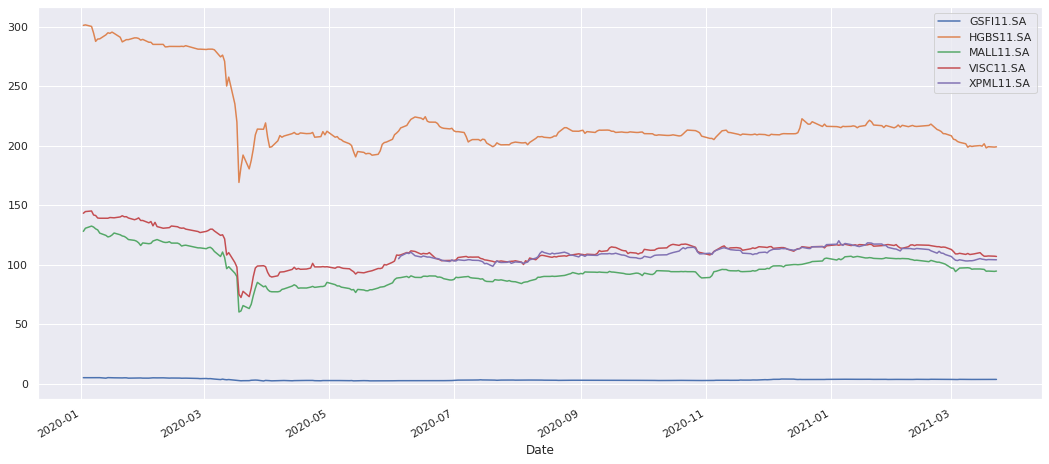

In [43]:
sns.set()
carteira.plot(figsize=(18,8));

In [44]:
#Precisa retirar um dia do FIM 2 para equiparar os data frames
fim2='22/03/2021'
ibov=inv.get_index_historical_data('Bovespa', country='brazil',from_date=inicio2,to_date=fim2)
ifix = inv.get_index_historical_data('BM&FBOVESPA Real Estate IFIX', country='brazil',from_date=inicio2,to_date=fim2)

In [45]:
len(ibov)
#ibov.tail(10)
#ibov.index

302

In [46]:
len(carteira)
#carteira.index

300

In [47]:
#
#Removendo o feriado da quarta feira de cinzas que um tem e o outro não 
#
def remove_quarta_cinzas(dataframe,dia):
  dia=dia#'2021-02-17'
  dataframe_loc=dataframe.loc[(dataframe.index == dia) ]
  return dataframe_loc

dia='2021-02-17'
dataframe_loc=remove_quarta_cinzas(ibov,dia)

ibov=ibov.drop(dataframe_loc.index)
ifix=ifix.drop(dataframe_loc.index)

dia='2020-02-17'
dataframe_loc=remove_quarta_cinzas(ibov,dia)

ibov=ibov.drop(dataframe_loc.index)
ifix=ifix.drop(dataframe_loc.index)

In [48]:
len(ibov)

300

In [49]:
len(carteira)

300

In [50]:
carteira["saldo"] = carteira.sum(axis=1)

In [51]:
Comparacao = pd.DataFrame()
data_inicio = ifix.index[0]

Comparacao['ifix'] = ifix['Close'] / ifix['Close'].loc[data_inicio]
Comparacao['ibov'] = ibov['Close'] / ibov['Close'].loc[data_inicio]
Comparacao['Carteira']=carteira["saldo"]/carteira["saldo"].loc[data_inicio]

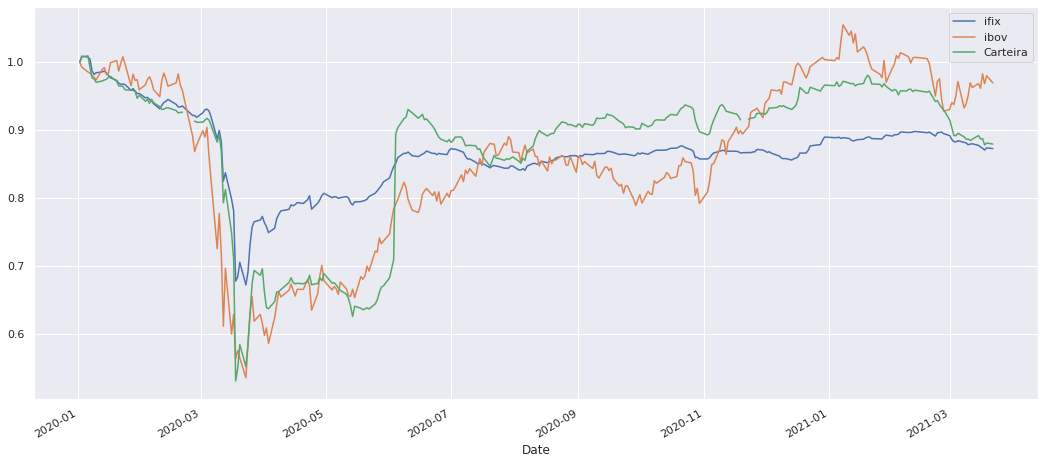

In [52]:
Comparacao.plot(figsize=(18,8));